# ทำไม America ถึงได้เหรียญมากกว่าประเทศอื่น

Dataset นี้เกี่ยวบันทึกกับการแข่งขันกีฬาต่างๆใน olympic ของปี 1896-2016 โดยใช้ข้อมูลจาก Kaggle มีการเก็บสถิติต่างๆ เช่น น้ำหนัก ส่วนสูง อายุ ชื่อ และ สัญชาติ ของผู้เข้าแข่งขัน เป็นต้น 

โดยใน Dataset นี้จะขอเจาะจงเฉพาะประเทศอเมริกา เพื่อหาสาเหตุว่าอะไรทำให้อเมริกาเป็นเจ้าแห่งโอลิมปิก(มีเหรียญมากที่สุด) โดยจะใช้การเปรียบเทียบค่าต่างๆเช่น  อายุ หรือ ส่วนสูง
กับค่าเฉลี่ย หรือ เทียบกับประเทศที่ได้เหรียญมากที่สุด

## Data import and cleaning

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sui = pd.read_csv('dataset_olympics.csv')

In [14]:
sui.describe()

,ID,Age,Height,Weight,Year
count,70000.000000,67268.000000,53746.000000,52899.000000,70000.000000
mean,18081.846986,25.644645,175.505303,70.900216,1977.766457
std,10235.613253,6.485239,10.384203,14.217489,30.103306
min,1.000000,11.000000,127.000000,25.000000,1896.000000
25%,9325.750000,21.000000,168.000000,61.000000,1960.000000
50%,18032.000000,25.000000,175.000000,70.000000,1984.000000
75%,26978.000000,28.000000,183.000000,79.000000,2002.000000
max,35658.000000,88.000000,223.000000,214.000000,2016.000000


In [15]:
sui.nunique()

ID        35658
Name      35556
Sex           2
Age          68
Height       87
Weight      173
Team        827
NOC         226
Games        51
Year         35
Season        2
City         42
Sport        65
Event       744
Medal         3
dtype: int64

In [16]:
sui.isna().sum()

ID            0
Name          0
Sex           0
Age        2732
Height    16254
Weight    17101
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     60310
dtype: int64

In [17]:
sui.duplicated().sum()

383

In [23]:
sui.drop_duplicates(subset=None,  keep='first', inplace=True)

In [25]:
sui['Age'] = sui['Age'].fillna(sui['Age'].mean())

In [27]:
sui['Height'] = sui['Height'].fillna(sui['Height'].mean())

In [29]:
sui['Weight'] = sui['Weight'].fillna(sui['Weight'].mean())

In [31]:
sui

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.000000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.000000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,175.504736,70.900216,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,175.504736,70.900216,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.000000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,35656,Stuart Fitzsimmons,M,19.0,175.504736,70.900216,Great Britain,GBR,1976 Winter,1976,Winter,Innsbruck,Alpine Skiing,Alpine Skiing Men's Giant Slalom,NaN
69996,35656,Stuart Fitzsimmons,M,19.0,175.504736,70.900216,Great Britain,GBR,1976 Winter,1976,Winter,Innsbruck,Alpine Skiing,Alpine Skiing Men's Slalom,NaN
69997,35657,"David Thomas ""Dave"" Fitzsimons",M,26.0,170.000000,65.000000,Australia,AUS,1976 Summer,1976,Summer,Montreal,Athletics,"Athletics Men's 10,000 metres",NaN
69998,35657,"David Thomas ""Dave"" Fitzsimons",M,30.0,170.000000,65.000000,Australia,AUS,1980 Summer,1980,Summer,Moskva,Athletics,"Athletics Men's 5,000 metres",NaN


## First, Focusing on Medals

In [ ]:
เริ่มจากหา Top 10 ประเทศที่ได้เหรียญมากที่สุดก่อน

In [35]:
##All medal by country 
sui_medals = sui.dropna(subset=['Medal'])

sui_med_counts = sui_medals.groupby(['Team','Medal']).size().unstack(fill_value=0)

sui_med_counts = sui_med_counts[["Gold", "Silver", "Bronze"]]
top_teams = sui_med_counts.sum(axis=1).nlargest(10).index
sui_top10 = sui_med_counts.loc[top_teams]
sui_top10


Medal,Gold,Silver,Bronze
Team,,,
United States,709,415,336
France,167,183,221
Italy,202,183,186
Soviet Union,212,145,147
Great Britain,154,164,163
Germany,133,135,128
Australia,97,124,149
Sweden,79,122,140
Canada,107,107,114


ทำการ plot stack bar 

<Figure size 1200x600 with 0 Axes>

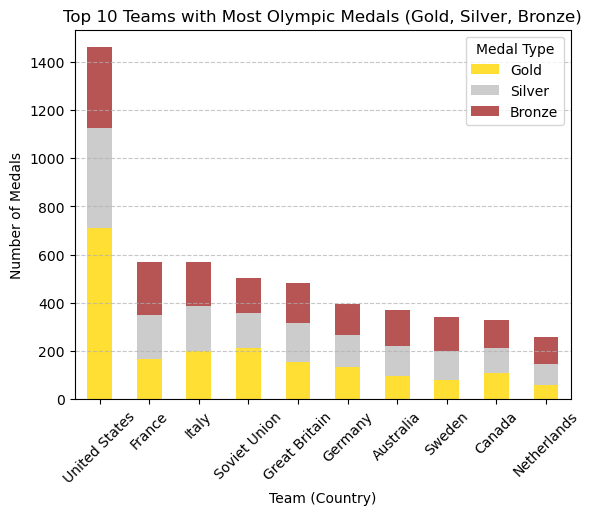

In [37]:

# Plot stacked bar chart
plt.figure(figsize=(12, 6))
sui_top10.plot(kind="bar", stacked=True, color=["gold", "silver", "brown"], alpha=0.8)

# Customize the plot
plt.xlabel("Team (Country)")
plt.ylabel("Number of Medals")
plt.title("Top 10 Teams with Most Olympic Medals (Gold, Silver, Bronze)")
plt.xticks(rotation=45)
plt.legend(title="Medal Type")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# ข้อสันนิษฐานที่ 1 คือ อเมริกามีการส่งคนเข้าประกวดได้มากกว่าประเทศอื่นหรือไม่   

หากมีผู้เข้าแข่งขันมากก็อาจจะมีความเป็นไปได้ที่จะมีโอกาสได้เหรียญรางวัลมากกว่าประเทศอื่นที่ส่งคนมาแข่งน้อยกว่า


solution

1. count participant graph by country

2. เทียบกับกราฟ count by medal 


หา 10 ประเทศที่มีผู้เข้าแข่งขันมากที่สุด

Text(0.5, 1.0, 'Most participants by Country')

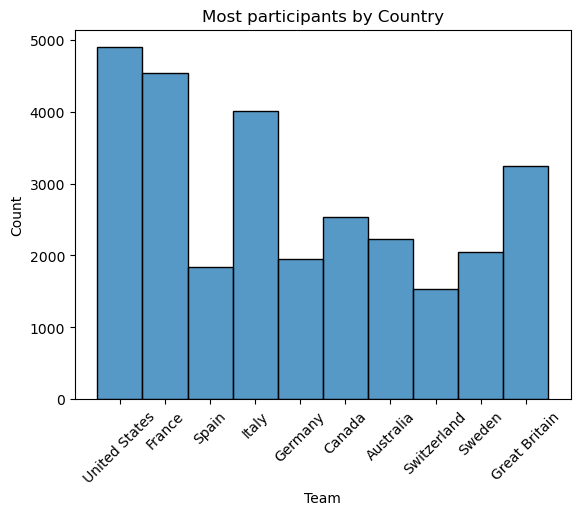

In [43]:
most_part_byC = sui['Team'].value_counts().nlargest(10).index
sui_most_part_byC =  sui[sui['Team'].isin(most_part_byC)]

sns.histplot(x= 'Team',data = sui_most_part_byC)
plt.xticks(rotation = 45)
plt.title('Most participants by Country')

In [45]:
sui_top10[sui_top10.index.isin(most_part_byC)].index

Index(['United States', 'France', 'Italy', 'Great Britain', 'Germany',
       'Australia', 'Sweden', 'Canada'],
      dtype='object', name='Team')

#### 8 จาก 10 ประเทศที่ส่งผู้เข้าแข่งขันมากที่สุดอยู่ใน Top 10 ประเทศที่ได้เหรียญรางวัลมากที่สุด โดยอเมริกาที่ได้เหรียญมากที่สุดเองก็คือประเทศทีส่งผู้เข้าแข่งขันไปมากที่สุด

#### สรุปได้ว่าจำนวนผู้เข้าแข่งขันมีส่วนชัดเจนต่อจำนวนเหรียญทอง

In [47]:
##All medal by country 


sui_med_counts2 = sui_medals.groupby(['Team','Medal']).size().unstack(fill_value=0)

sui_med_counts2 = sui_med_counts[["Gold", "Silver", "Bronze"]]
sui_med_counts2['Total']  = sui_med_counts2.sum(axis=1)
sui_med_counts2 = sui_med_counts2.sort_values(by = 'Total',ascending = False)
sui_med_counts2 = sui_med_counts2[sui_med_counts2['Total'] > 100]
sui_med_counts2.reset_index(inplace=True)
sui_med_counts2

Medal,Team,Gold,Silver,Bronze,Total
0,United States,709,415,336,1460
1,France,167,183,221,571
2,Italy,202,183,186,571
3,Soviet Union,212,145,147,504
4,Great Britain,154,164,163,481
5,Germany,133,135,128,396
6,Australia,97,124,149,370
7,Sweden,79,122,140,341
8,Canada,107,107,114,328
9,Netherlands,58,90,109,257


In [49]:
sui_top_team = sui[sui['Team'].isin(sui_med_counts2['Team'])]


most_med_C_count = sui_top_team.groupby('Team').size().reset_index(name = 'Total Participant').sort_values(by = 'Total Participant',ascending = False)

most_med_C_count




,Team,Total Participant
21,United States,4896
8,France,4539
12,Italy,4010
10,Great Britain,3248
3,Canada,2536
0,Australia,2235
19,Sweden,2043
9,Germany,1946
18,Spain,1836
20,Switzerland,1530


ต่อมาหาอัตราสำเร็จว่านักกีฬาที่ได้เหรียญเทียบเป็นอัตราส่วนเท่าไรของนักกีฬาทั้งหมด

In [51]:
most_med_C_count_indexed = most_med_C_count.set_index('Team')

result = sui_med_counts2.join(most_med_C_count_indexed, on='Team', how='left')
result['ratio'] = result['Total']/result['Total Participant']
result = result.sort_values(by = 'ratio',ascending = False)
result

,Team,Gold,Silver,Bronze,Total,Total Participant,ratio
3,Soviet Union,212,145,147,504,1162,0.433735
14,East Germany,73,59,63,195,527,0.370019
0,United States,709,415,336,1460,4896,0.298203
12,Russia,72,67,80,219,1030,0.212621
11,Norway,82,84,65,231,1134,0.203704
5,Germany,133,135,128,396,1946,0.203494
19,China,44,37,33,114,580,0.196552
9,Netherlands,58,90,109,257,1443,0.178101
20,West Germany,36,40,37,113,643,0.175739
22,Denmark,41,40,26,107,631,0.169572


Text(0.5, 0, ' medal winner to participants ratio')

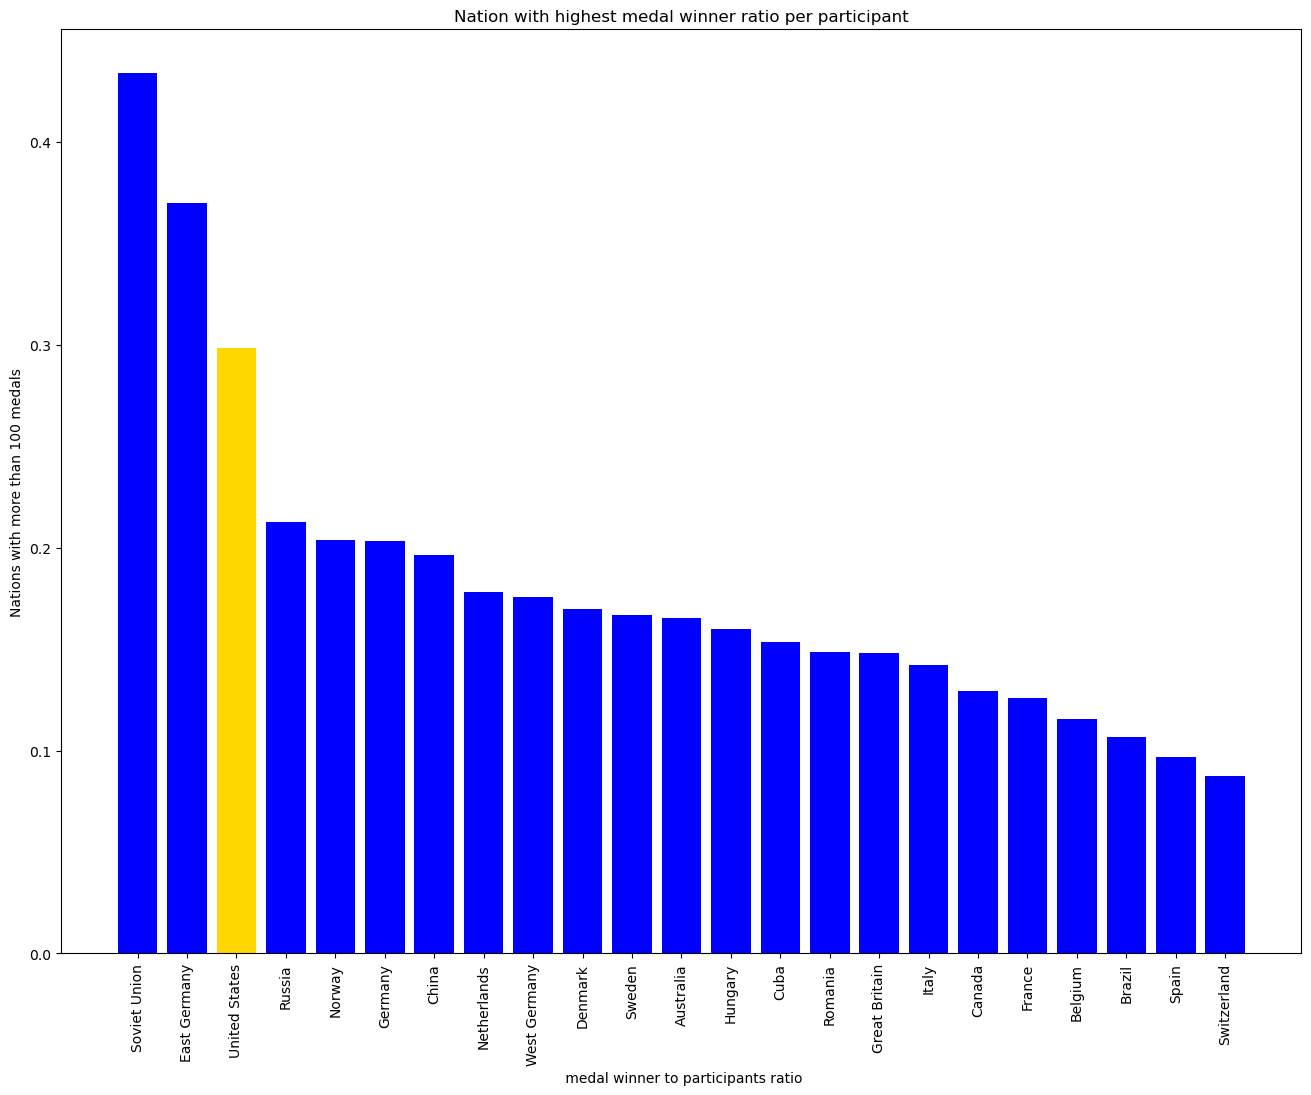

In [53]:
fig, ax = plt.subplots(figsize=(16, 12))
colors = ['gold' if t == 'United States' else 'blue' for t in result['Team']]
ax.bar(result['Team'], result['ratio'], color=colors)
plt.xticks(rotation = 90)
plt.title('Nation with highest medal winner ratio per participant')
plt.ylabel('Nations with more than 100 medals')
plt.xlabel(' medal winner to participants ratio')

ปรากฏว่า USA อยู่อันดับที่ 3 จึงสรุปได้ว่านอกจากจำนวนนักกีฬาที่ส่งไปมากแล้ว นักกีฬาที่ส่งไปก็ถือว่ามีความสามารถสูงเช่นกัน

ต่อไปหากีฬาที่ US ประสบความสำเร็จที่สุด

In [98]:
usa = sui[sui['Team'] == 'United States']
sport_medal = usa.groupby('Sport').size().sort_values(ascending=False)
top10_sports = sport_medal.head(10)

C:\Users\User\AppData\Local\Temp\ipykernel_10484\645200230.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_sports.values, y=top10_sports.index, palette='coolwarm')


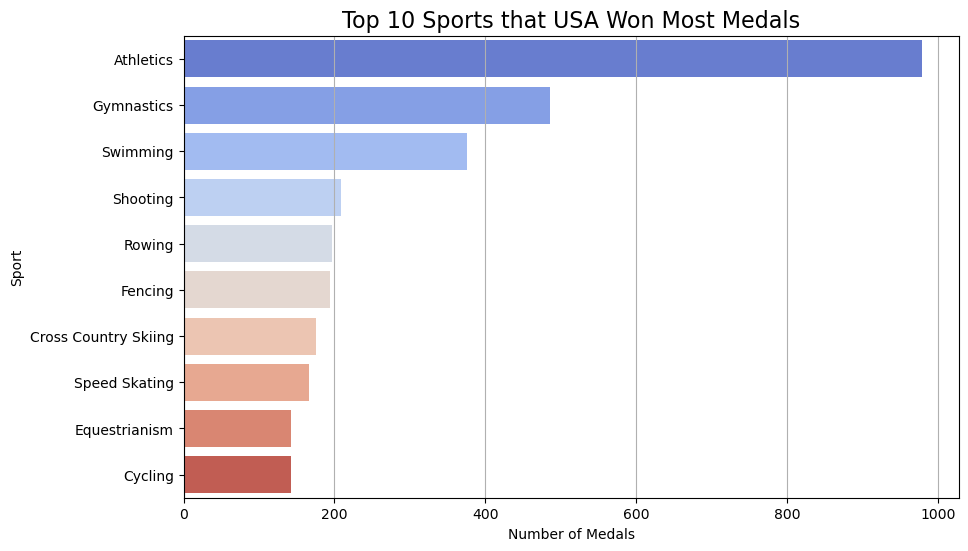

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=top10_sports.values, y=top10_sports.index, palette='coolwarm')

plt.title('Top 10 Sports that USA Won Most Medals', fontsize=16)
plt.xlabel('Number of Medals')
plt.ylabel('Sport')
plt.grid(axis='x')
plt.show()

# Athletics

คราวนี้อยากลองจะscope กีฬากรีฑา เพราะเป็นกีฬาที่ USA ประสบความสำเร็จที่สุด

# ข้อสันนิษฐานที่ 2 คือ นักกีฬาของ USA มีสภาพร่างกายที่ดีกว่านักกีฬาชาติอื่น

### หา avg age ของ USA vs All vs Medal winners 

In [55]:
sui_run = sui[sui['Sport']=='Athletics']
mean_run = sui_run['Age'].mean()
mean_run 

25.049967149076362

In [57]:
sui_run_us = sui[(sui['Sport'] == 'Athletics') & (sui['Team'] == 'United States')]
mean_run_us = sui_run_us['Age'].mean()
mean_run_us

24.933162350365468

In [59]:

sui_run_med = sui_medals[sui_medals['Sport']=='Athletics']
mean_run_med = sui_run_med['Age'].mean()
mean_run_med

24.88188026260876

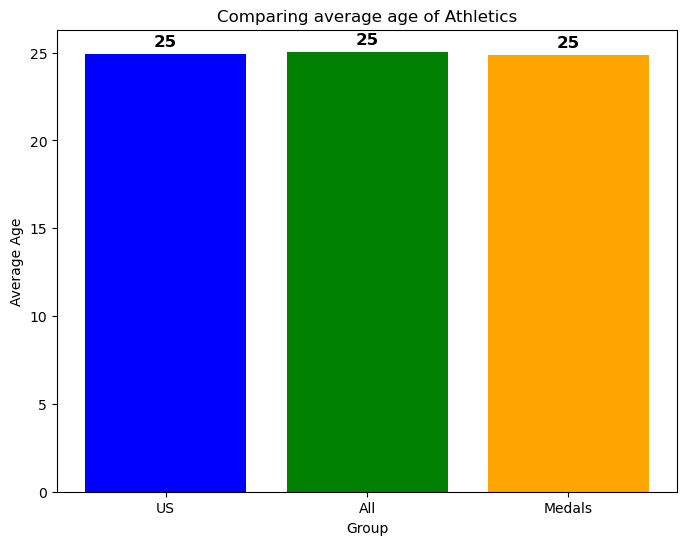

In [61]:
Categories = ['US', 'All', 'Medals']
avg = [mean_run_us, mean_run, mean_run_med]

fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(Categories, avg, color=['blue', 'green', 'orange'])

for bar in bars:
    height = bar.get_height()
    if height > 0:  # Ignore zero values
        ax.annotate(
            f'{height:.0f}',  # Display value
            xy=(bar.get_x() + bar.get_width() / 2, height),  # Position at top center of the bar
            xytext=(0, 3),  # Offset text by 3 points above the bar
            textcoords='offset points',
            ha='center', va='bottom', 
            fontsize=12, fontweight='bold', color='black'
        )

ax.set_xlabel('Group')
ax.set_ylabel('Average Age')
ax.set_title('Comparing average age of Athletics')
plt.show()

### BMI

In [163]:
sui_run.head(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,BMI
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,70.900216,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,25.120541


In [65]:
## weight/height(m)**2
sui_run = sui_run.copy()
sui_run.loc[:, 'BMI'] = sui_run['Weight'] / ((sui_run['Height'] * 0.01) ** 2)
sui_run_us.loc[:, 'BMI'] = sui_run_us['Weight'] / ((sui_run['Height'] * 0.01) ** 2)
sui_run_med.loc[:, 'BMI'] = sui_run_med['Weight'] / ((sui_run['Height'] * 0.01) ** 2)


mean_bmi_us = sui_run_us['BMI'].mean()
mean_bmi = sui_run['BMI'].mean()
mean_bmi_med = sui_run_med['BMI'].mean()

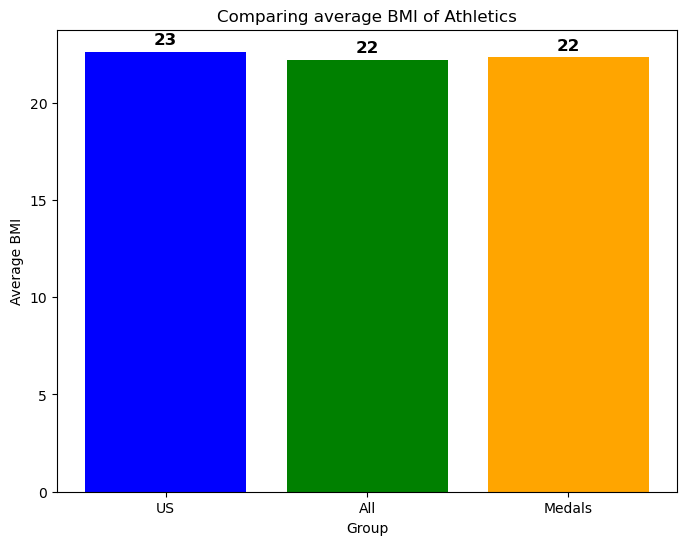

In [67]:
Categories = ['US', 'All', 'Medals']
avg_bmi = [mean_bmi_us, mean_bmi, mean_bmi_med]

fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(Categories, avg_bmi, color=['blue', 'green', 'orange'])

for bar in bars:
    height = bar.get_height()
    if height > 0:  # Ignore zero values
        ax.annotate(
            f'{height:.0f}',  # Display value
            xy=(bar.get_x() + bar.get_width() / 2, height),  # Position at top center of the bar
            xytext=(0, 3),  # Offset text by 3 points above the bar
            textcoords='offset points',
            ha='center', va='bottom', 
            fontsize=12, fontweight='bold', color='black'
        )

ax.set_xlabel('Group')
ax.set_ylabel('Average BMI')
ax.set_title('Comparing average BMI of Athletics')
plt.show()

สรุปว่าไม่สามารถสรุปได้ด้วยข้อมูลที่มีว่านักกีฬากรีฑาจาก USA มีสภาพร่างกายที่ดีกว่า

## Golden generation
plot  Count US medal griup by year เพื่อหาช่วงที่ได้เหรียญทองมากที่สุด

## ข้อสันนิษฐานที่ 3 คือ USA มียุคที่สามารถกอบโกยเหรียญได้มากและมีนักกีฬาที่เป็น serial winner

In [75]:
### Finding America golden era

sui_us = sui_medals[sui_medals['Team']=='United States']
medal_by_year = sui_us.groupby('Year')['Medal'].size()
##All medal by year
medal_by_year = medal_by_year.reset_index().sort_values(by = 'Medal',ascending = False)
medal_by_year

,Year,Medal
20,1984,105
34,2016,85
22,1992,73
30,2008,72
21,1988,69
24,1996,67
32,2012,63
28,2004,63
9,1932,61
15,1964,57


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34],
 [Text(0, 0, '1896'),
  Text(1, 0, '1900'),
  Text(2, 0, '1904'),
  Text(3, 0, '1906'),
  Text(4, 0, '1908'),
  Text(5, 0, '1912'),
  Text(6, 0, '1920'),
  Text(7, 0, '1924'),
  Text(8, 0, '1928'),
  Text(9, 0, '1932'),
  Text(10, 0, '1936'),
  Text(11, 0, '1948'),
  Text(12, 0, '1952'),
  Text(13, 0, '1956'),
  Text(14, 0, '1960'),
  Text(15, 0, '1964'),
  Text(16, 0, '1968'),
  Text(17, 0, '1972'),
  Text(18, 0, '1976'),
  Text(19, 0, '1980'),
  Text(20, 0, '1984'),
  Text(21, 0, '1988'),
  Text(22, 0, '1992'),
  Text(23, 0, '1994'),
  Text(24, 0, '1996'),
  Text(25, 0, '1998'),
  Text(26, 0, '2000'),
  Text(27, 0, '2002'),
  Text(28, 0, '2004'),
  Text(29, 0, '2006'),
  Text(30, 0, '2008'),
  Text(31, 0, '2010'),
  Text(32, 0, '2012'),
  Text(33, 0, '2014'),
  Text(34, 0, '2016')])

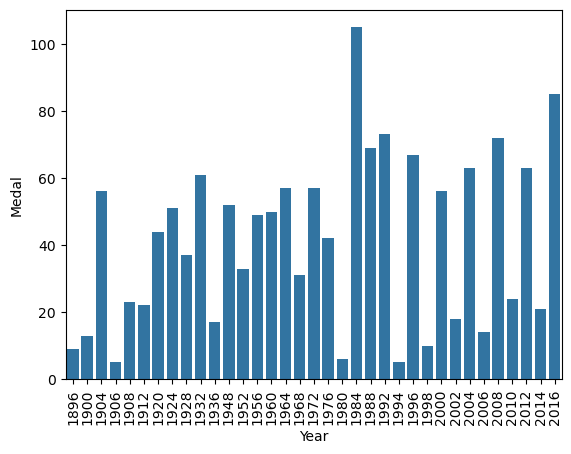

In [77]:
sns.barplot(x = 'Year',y = 'Medal',data = medal_by_year)
plt.xticks(rotation = 90)

### หาคนที่ได้เหรียญมากที่สุด10คนของชาติอื่นเพื่อเทียบกับ คนที่ได้เหรียญมากที่สุด10คนของUSA

In [79]:
most_med_individual = sui_us.groupby('Name').size().sort_values(ascending = False)
most_med_individual = most_med_individual.reset_index(name = 'count')
most_med_individual['Team'] = 'US'
most_med_individual = most_med_individual.nlargest(10,'count')

In [81]:
sui_others = sui_medals[sui_medals['Team'] != 'United States']

In [83]:
sui_others
most_med_individual_others = sui_others.groupby(['Name','Team']).size().sort_values(ascending = False)
most_med_individual_others = most_med_individual_others.reset_index(name = 'count')
#most_med_individual_others['Team'] = 'Not US'
most_med_individual_others  = most_med_individual_others.nlargest(10,'count')
most_med_individual_others 

,Name,Team,count
0,Nikolay Yefimovich Andrianov,Soviet Union,15
1,Ole Einar Bjrndalen,Norway,13
2,Viktor Ivanovych Chukarin,Soviet Union,11
3,Vra slavsk (-Odloilov),Czechoslovakia,11
4,Stefania Belmondo,Italy,10
5,Aleksandr Nikolayevich Dityatin,Soviet Union,10
6,Marit Bjrgen,Norway,10
7,Polina Hryhorivna Astakhova,Soviet Union,10
8,Nadia Elena Comneci (-Conner),Romania,9
9,"Ursula ""Uschi"" Disl",Germany,9


In [85]:
most_med_individual_comb = pd.concat([most_med_individual, most_med_individual_others], axis=0, ignore_index=True)
most_med_individual_comb 


,Name,count,Team
0,Natalie Anne Coughlin (-Hall),12,US
1,"Matthew Nicholas ""Matt"" Biondi",11,US
2,"Raymond Clarence ""Ray"" Ewry",10,US
3,Allyson Michelle Felix,9,US
4,Shirley Frances Babashoff,9,US
5,Nathan Ghar-Jun Adrian,8,US
6,"Charles Meldrum ""Charlie"" Daniels",7,US
7,Amanda Ray Beard (-Brown),7,US
8,Bonnie Kathleen Blair (-Cruikshank),6,US
9,George Louis Eyser,6,US


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Natalie Anne Coughlin (-Hall)'),
  Text(1, 0, 'Matthew Nicholas "Matt" Biondi'),
  Text(2, 0, 'Raymond Clarence "Ray" Ewry'),
  Text(3, 0, 'Allyson Michelle Felix'),
  Text(4, 0, 'Shirley Frances Babashoff'),
  Text(5, 0, 'Nathan Ghar-Jun Adrian'),
  Text(6, 0, 'Charles Meldrum "Charlie" Daniels'),
  Text(7, 0, 'Amanda Ray Beard (-Brown)'),
  Text(8, 0, 'Bonnie Kathleen Blair (-Cruikshank)'),
  Text(9, 0, 'George Louis Eyser'),
  Text(10, 0, 'Nikolay Yefimovich Andrianov'),
  Text(11, 0, 'Ole Einar Bjrndalen'),
  Text(12, 0, 'Viktor Ivanovych Chukarin'),
  Text(13, 0, 'Vra slavsk (-Odloilov)'),
  Text(14, 0, 'Stefania Belmondo'),
  Text(15, 0, 'Aleksandr Nikolayevich Dityatin'),
  Text(16, 0, 'Marit Bjrgen'),
  Text(17, 0, 'Polina Hryhorivna Astakhova'),
  Text(18, 0, 'Nadia Elena Comneci (-Conner)'),
  Text(19, 0, 'Ursula "Uschi" Disl')])

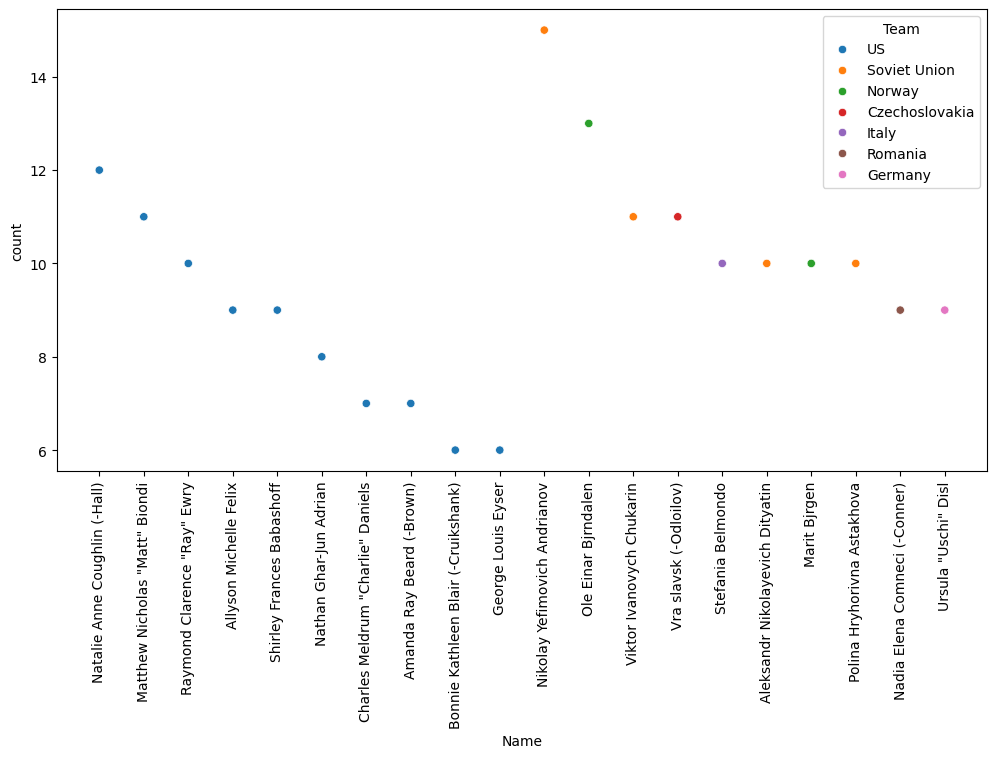

In [87]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x = 'Name',y = 'count',data = most_med_individual_comb,hue = 'Team')
plt.xticks(rotation = 90)

พบว่ามีนักกีฬาจากUSA ที่ได้10เหรียญหรือมากกว่าถึง 3 คน มีเพียงชาติ Soviet เท่านั้นที่มีนักกีฬาที่ได้เหรียญเกิน10เหรียญมากกว่า USA 

## สรุป

#### จากข้อมูลที่ได้จาก Dataset นี้สามารถตอบคำถามได้ว่าสาเหตุที่ USA เป็นประเทศที่ประสบความสำเร็จมากที่สุดเป็นเพราะมีจำนวนการส่งผู้เข้าแข่งขันไปมากที่สุดบวกกับมีอัตราความสำเร็จที่สูงเป็นอันดับ 3  นอกจากนั้นยังมีช่วงปีที่ได้เหรียญจำนวนมากติดๆกัน (1984-1992) และยังมีนักกีฬาที่คว้าเหรียญได้จำนวนมากต่อคนถ้าเทียบกับชาติอื่น ส่วนข้อสันนิษฐานที่ว่านักกีฬาจาก US มีสภาพร่างกายที่ดีกว่านักกีฬาชาติอื่นนั้นไม่สามารถสรุปได้ด้วยข้อมูลที่มี